# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

### Let's Import the modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


## Task 2 

### Task 2.1: importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [2]:
corona_dataset_csv=pd.read_csv("Datasets/covid19_Confirmed_dataset.csv")
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Let's check the shape of the dataframe

In [3]:
corona_dataset_csv.shape

(266, 104)

In [4]:
corona_dataset_csv.isnull().sum()

Province/State    184
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/26/20             0
4/27/20             0
4/28/20             0
4/29/20             0
4/30/20             0
Length: 104, dtype: int64

### Task 2.2: Delete the useless columns

In [5]:
corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)

In [6]:
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Task 2.3: Aggregating the rows by the country

In [7]:
corona_dataset_agg=corona_dataset_csv.groupby("Country/Region").sum()

In [8]:
corona_dataset_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
corona_dataset_agg.shape

(187, 100)

### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

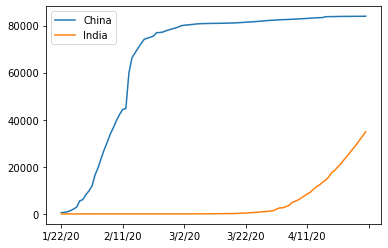

In [10]:
corona_dataset_agg.loc["China"].plot()
corona_dataset_agg.loc["India"].plot()
plt.legend()

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

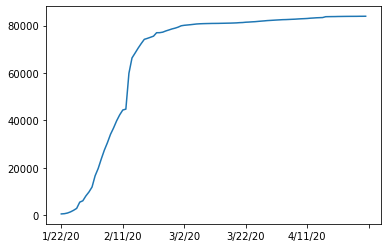

In [11]:
corona_dataset_agg.loc['China'].plot()

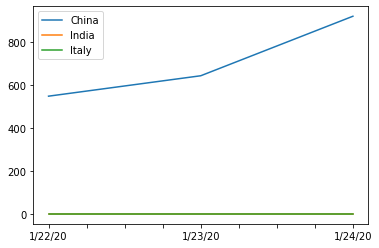

In [12]:
corona_dataset_agg.loc['China'][:3].plot()
corona_dataset_agg.loc['India'][:3].plot()
corona_dataset_agg.loc['Italy'][:3].plot()
plt.legend()

### task 3.1: caculating the first derivative of the curve

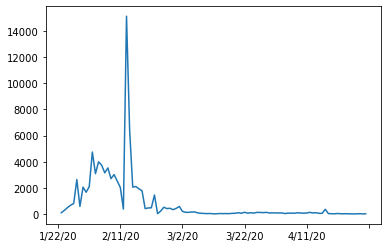

In [13]:
corona_dataset_agg.loc["China"].diff().plot()

### task 3.2: find maxmimum infection rate for China

In [14]:
corona_dataset_agg.loc["China"].diff().max()

15136.0

In [15]:
corona_dataset_agg.loc["Italy"].diff().max()

6557.0

In [16]:
corona_dataset_agg.loc["Spain"].diff().max()

9630.0

### Task 3.3: find maximum infection rate for all of the countries. 

In [17]:
countries=list(corona_dataset_agg.index)
max_infection_rates=[]
for c in countries:
    max_infection_rates.append(corona_dataset_agg.loc[c].max())
max_infection_rates    

[2171,
 773,
 4006,
 745,
 27,
 24,
 4428,
 2066,
 6766,
 15452,
 1804,
 81,
 3040,
 7667,
 81,
 14027,
 48519,
 18,
 64,
 7,
 1110,
 1757,
 23,
 87187,
 138,
 1506,
 645,
 151,
 11,
 121,
 122,
 1832,
 54457,
 50,
 73,
 16023,
 83956,
 6507,
 1,
 220,
 572,
 719,
 1275,
 2076,
 1501,
 850,
 7682,
 9356,
 712,
 1089,
 16,
 6972,
 24934,
 5537,
 395,
 315,
 39,
 1689,
 100,
 131,
 18,
 4995,
 169053,
 276,
 11,
 539,
 163009,
 2074,
 2591,
 20,
 599,
 1495,
 205,
 82,
 81,
 11,
 771,
 2775,
 1797,
 34863,
 10118,
 94640,
 2085,
 20612,
 15946,
 205463,
 422,
 14153,
 453,
 3402,
 396,
 10774,
 799,
 4024,
 746,
 19,
 858,
 725,
 141,
 61,
 82,
 1449,
 3784,
 9,
 128,
 37,
 6002,
 468,
 490,
 465,
 8,
 334,
 19224,
 3897,
 95,
 38,
 322,
 4423,
 76,
 16,
 57,
 39512,
 1479,
 14,
 719,
 1932,
 1465,
 7738,
 2348,
 16817,
 6532,
 8,
 266,
 36976,
 8488,
 12877,
 25045,
 13409,
 12240,
 106498,
 243,
 15,
 17,
 16,
 569,
 14,
 22753,
 933,
 9009,
 11,
 124,
 16169,
 1396,
 1429,
 601,
 5647

In [18]:
corona_dataset_agg["max_infection_rate"]=max_infection_rates

In [19]:
corona_dataset_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,745
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,27


### Task 3.4: create a new dataframe with only needed column 

In [20]:
corona_data=pd.DataFrame(corona_dataset_agg["max_infection_rate"])

In [21]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,2171
Albania,773
Algeria,4006
Andorra,745
Angola,27


### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [22]:
happiness_report=pd.read_csv("Datasets/worldwide_happiness_report.csv")


In [23]:
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [24]:
happiness_report[happiness_report['Country or region']=="India"]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
139,140,India,4.015,0.755,0.765,0.588,0.498,0.2,0.085


In [25]:
happiness_report[happiness_report['Country or region']=="China"]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
92,93,China,5.191,1.029,1.125,0.893,0.521,0.058,0.1


### Task 4.2: let's drop the useless columns 

In [26]:
happiness_report.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [27]:
useless_col=['Overall rank', 'Score'
       , 
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']

### Task 4.3: changing the indices of the dataframe

In [28]:
happiness_report.drop(useless_col,axis=1,inplace=True)

In [29]:
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy
0,Finland,1.340,1.587,0.986
1,Denmark,1.383,1.573,0.996
2,Norway,1.488,1.582,1.028
3,Iceland,1.380,1.624,1.026
4,Netherlands,1.396,1.522,0.999


### Task4.4: now let's join two dataset we have prepared  

In [31]:
happiness_report.set_index("Country or region",inplace=True)

In [33]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy
Country or region,,,
Finland,1.340,1.587,0.986
Denmark,1.383,1.573,0.996
Norway,1.488,1.582,1.028
Iceland,1.380,1.624,1.026
Netherlands,1.396,1.522,0.999


#### Corona Dataset :

In [34]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,2171
Albania,773
Algeria,4006
Andorra,745
Angola,27


In [36]:
corona_data.shape

(187, 1)

#### wolrd happiness report Dataset :

In [35]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy
Country or region,,,
Finland,1.340,1.587,0.986
Denmark,1.383,1.573,0.996
Norway,1.488,1.582,1.028
Iceland,1.380,1.624,1.026
Netherlands,1.396,1.522,0.999


In [37]:
happiness_report.shape

(156, 3)

In [40]:
data=corona_data.join(happiness_report,how="inner")
data

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy
Afghanistan,2171,0.350,0.517,0.361
Albania,773,0.947,0.848,0.874
Algeria,4006,1.002,1.160,0.785
Argentina,4428,1.092,1.432,0.881
Armenia,2066,0.850,1.055,0.815
...,...,...,...,...
Venezuela,333,0.960,1.427,0.805
Vietnam,270,0.741,1.346,0.851
Yemen,6,0.287,1.163,0.463
Zambia,106,0.578,1.058,0.426


### Task 4.5: correlation matrix 

In [43]:
data.corr()["max_infection_rate"].sort_values(ascending=False)

max_infection_rate         1.000000
Healthy life expectancy    0.341925
GDP per capita             0.328993
Social support             0.241542
Name: max_infection_rate, dtype: float64

### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [44]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy
Afghanistan,2171,0.350,0.517,0.361
Albania,773,0.947,0.848,0.874
Algeria,4006,1.002,1.160,0.785
Argentina,4428,1.092,1.432,0.881
Armenia,2066,0.850,1.055,0.815


### Task 5.1: Plotting GDP vs maximum Infection rate

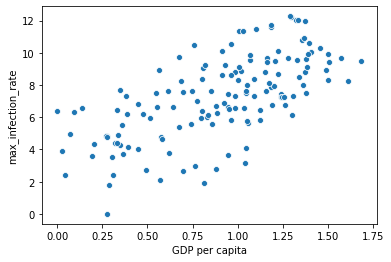

In [46]:
x=data["GDP per capita"]
y=data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

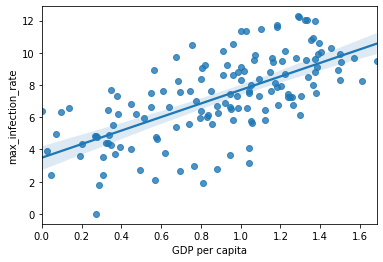

In [47]:
sns.regplot(x,np.log(y))

### Task 5.2: Plotting Social support vs maximum Infection rate

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate